In [1]:
%pylab inline
from mba import *
seed(13)

Populating the interactive namespace from numpy and matplotlib


### Using MBA

`cmin` and `cmax` are coordinates of the bottom-left and the top-right corners of the bounding box containing scattered data. `coo` and `val` are arrays containing coordinates and values of the data points.

In [2]:
cmin = [0.0, 0.0]
cmax = [1.0, 1.0]
coo  = uniform(0, 1, (7,2))
val  = uniform(0, 1, coo.shape[0])

Create $n \times n$ regular grid of coordinates to interpolate onto.

In [3]:
n = 100
s = linspace(0,1,n)
x = array(meshgrid(s,s)).transpose([1,2,0]).copy()

The `plot_surface()` function constructs MBA class with the given initial grid size, interpolates the input data over regular surface, and plots the results

In [4]:
def plot_surface(m0):
    interp = mba2(cmin, cmax, [m0,m0], coo, val)
    error = amax(abs(val - interp(coo))) / amax(abs(val))
    v = interp(x)
    pcolormesh(s, s, v, cmap='RdBu')
    scatter(x=coo[:,0], y=coo[:,1], c=val, cmap='RdBu')
    xlim([0,1])
    ylim([0,1])
    title("$m_0 = {0:}$, error = {1:.3e}".format(m0, error))
    colorbar();

The smaller the initial grid size, the smoother the interpolated surface.

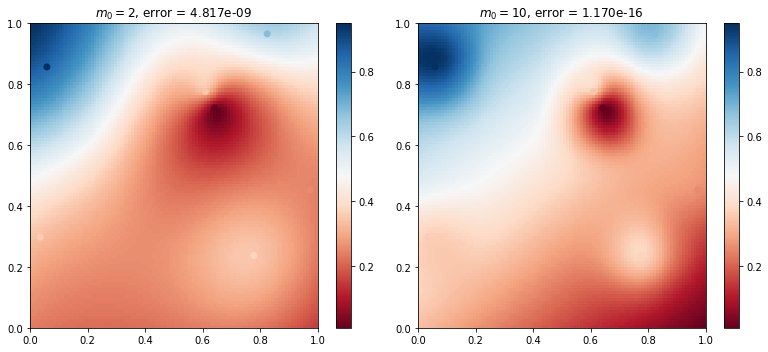

In [5]:
figure(figsize=(11,5))
subplot(121); plot_surface(2)
subplot(122); plot_surface(10)
tight_layout()

### Report some timings and statistics about the constructed hierarchy:

In [6]:
%%timeit
interp = mba2(cmin, cmax, [3,3], coo, val)

107 µs ± 5.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%%timeit interp = mba2(cmin, cmax, [3,3], coo, val)
v = interp(x)

12.2 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
interp = mba2(cmin, cmax, [3,3], coo, val)
print(interp)

level 1: initial approximation
level 2: dense  [19, 19] (2888 bytes)
level 3: sparse [35, 35] (2472 bytes, compression: 0.25)
level 4: sparse [67, 67] (2664 bytes, compression: 0.07)



### Specifing the initial approximation

By default MBA uses linear approximation as an initial guess. Multilevel B-splines then are used to fit the difference between initial approximation and the actual data. Sometimes it may useful to provide an initial approximation that would better fit the underlying model. Here is a simple example demonstrating this:

In [9]:
def test_initial(x0, y0, init, desc):
    interp = mba1([0], [1], [8], x0, y0, init)
    x = linspace(0, 1, 100).reshape(100,1)
    y = interp(x)
    plot(x, y, 'k-')
    plot(x, [init(x) for x in x], 'k:')
    plot(x0, y0, 'ro')
    ylim([0,1])
    title(desc)

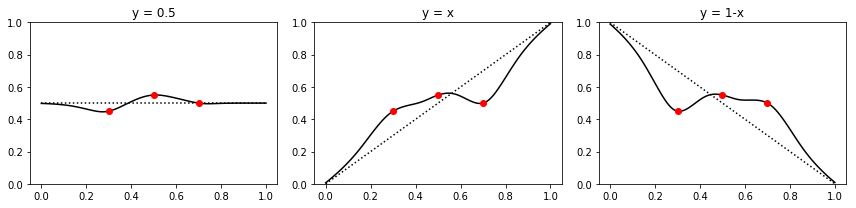

In [10]:
x = [[0.3], [0.5], [0.7]]
v = [0.45, 0.55, 0.5, ]
figure(figsize=(12, 3))
subplot(131); test_initial(x, v, lambda x: 0.5, 'y = 0.5')
subplot(132); test_initial(x, v, lambda x: x[0], 'y = x')
subplot(133); test_initial(x, v, lambda x: 1-x[0], 'y = 1-x')
tight_layout()